In [54]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('FIFA-Data/players_15.csv')
data = data.fillna('')
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16150,220806,https://sofifa.com/player/220806/ellis-redman/...,E. Redman,Ellis Redman,17,1996-09-26,187,81,Wales,Newport County,...,37+0,38+0,38+0,38+0,37+0,40+0,41+0,41+0,41+0,40+0
16151,225509,https://sofifa.com/player/225509/aaron-collins...,A. Collins,Aaron Collins,17,1997-06-01,178,57,Wales,Newport County,...,31+0,30+0,30+0,30+0,31+0,32+0,31+0,31+0,31+0,32+0
16152,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,P. Żemło,Piotr Żemło,18,1995-07-10,190,76,Poland,Wisła Kraków,...,48+0,46+0,46+0,46+0,48+0,51+,53+,53+,53+,51+
16153,222947,https://sofifa.com/player/222947/tom-davies/15...,T. Davies,Tom Davies,22,1992-04-18,180,70,England,Fleetwood Town,...,37+0,36+0,36+0,36+0,37+0,39+0,40+0,40+0,40+0,39+0


<ipython-input-55-390731ece7d6>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1)


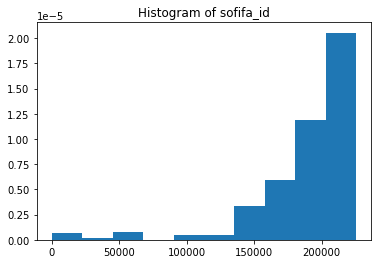

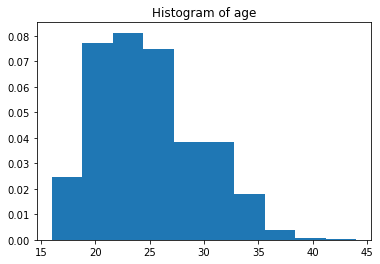

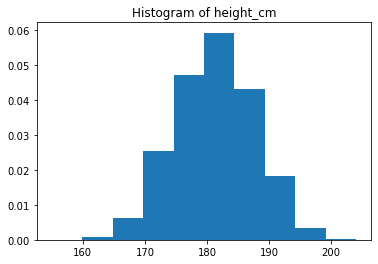

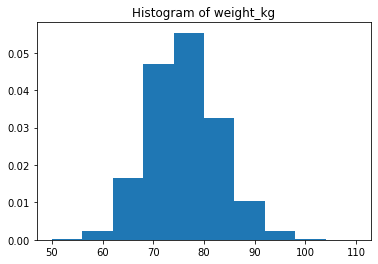

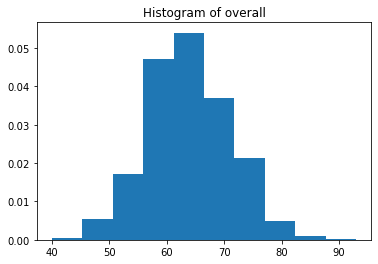

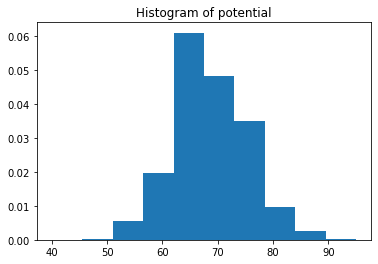

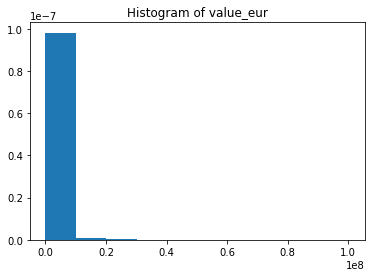

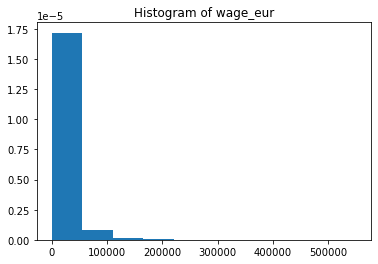

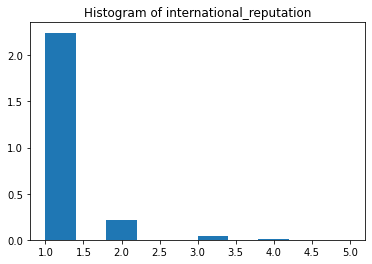

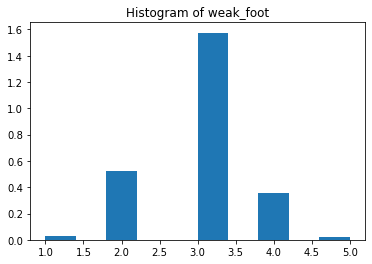

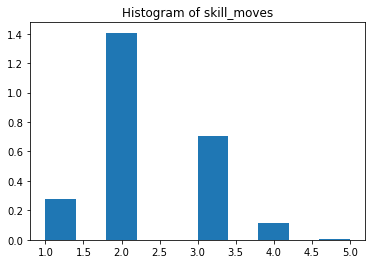

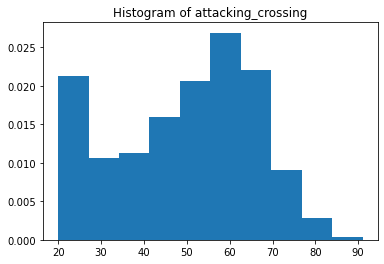

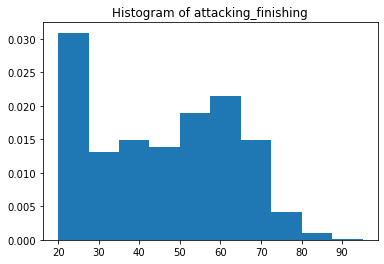

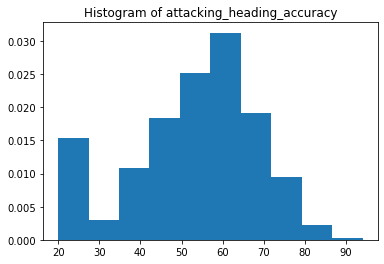

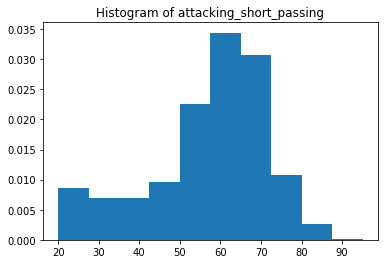

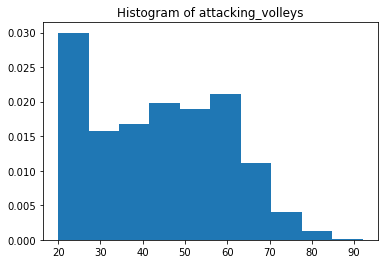

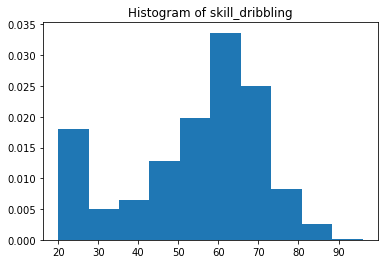

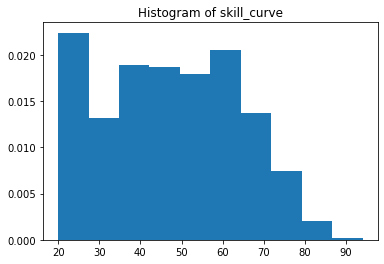

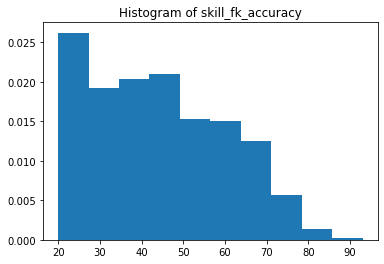

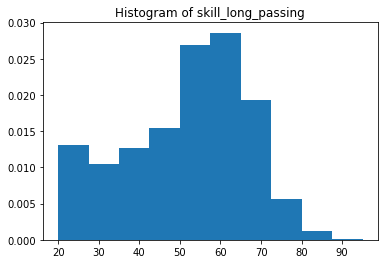

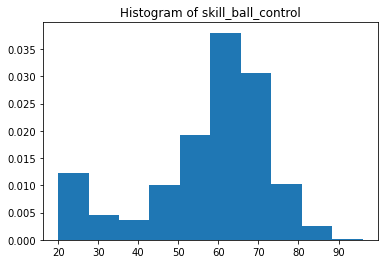

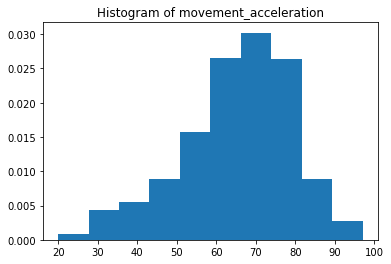

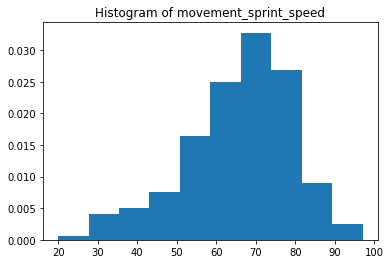

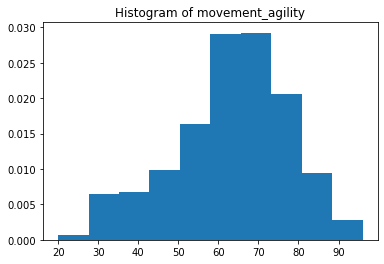

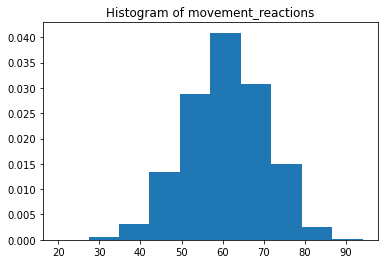

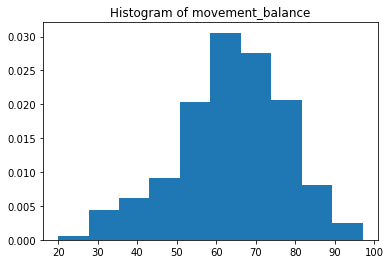

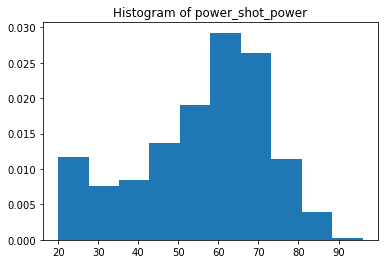

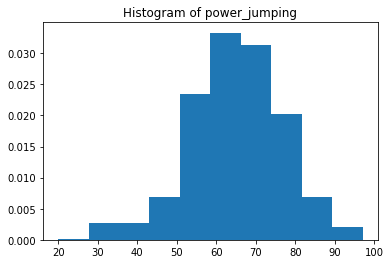

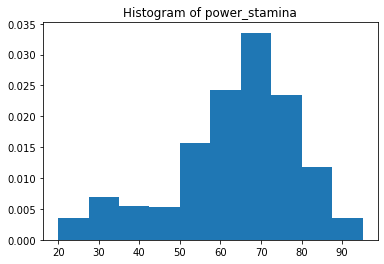

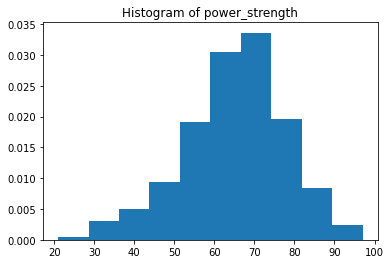

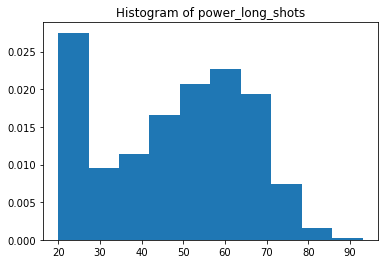

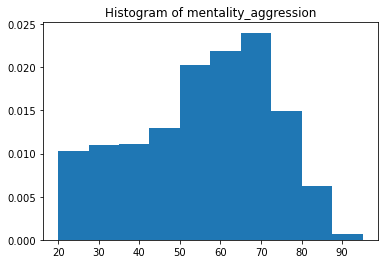

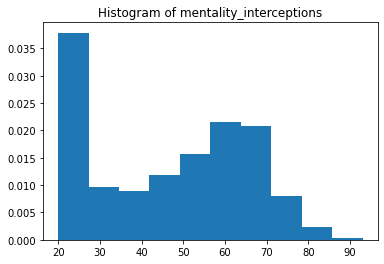

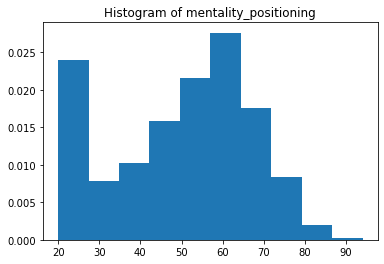

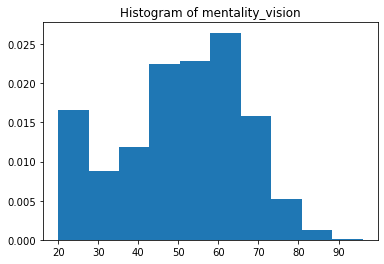

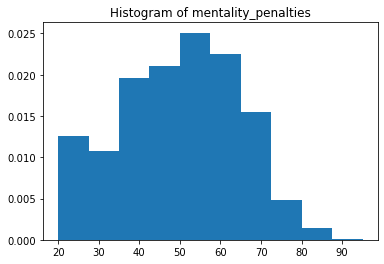

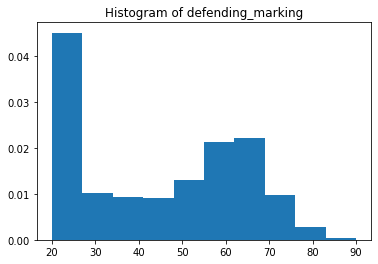

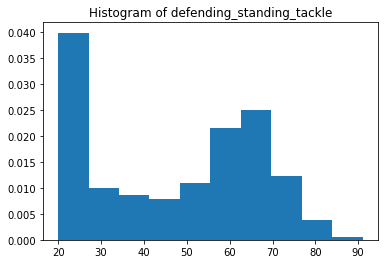

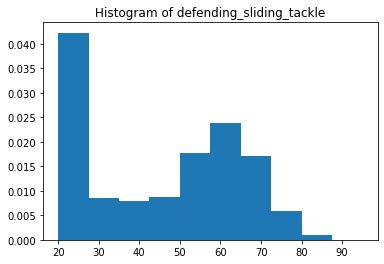

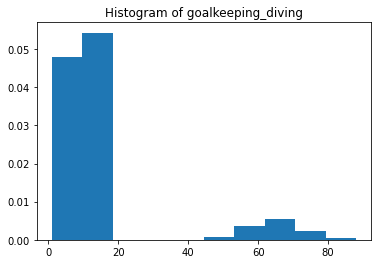

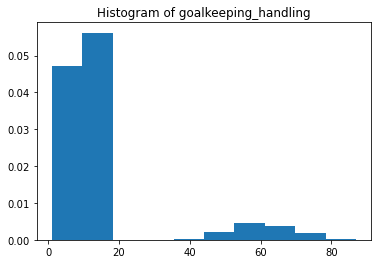

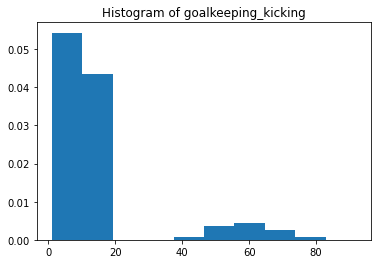

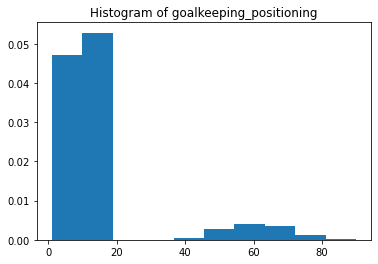

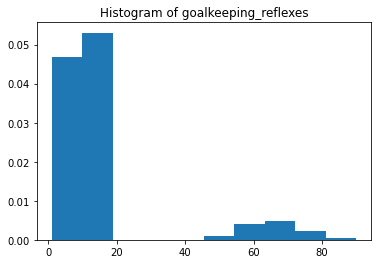

In [55]:
# Histograms of all int64 columns - captures all quantitative score columns

int_indeces = []
for d in range(len(data.dtypes)):
    if data.dtypes[d] == 'int64':
        int_indeces.append(data.columns[d])
    
def draw_hists(cols):
    for c in range(len(cols)):
        fig, axs = plt.subplots(1)
        axs.hist(data[cols[c]], density=True)
        axs.set_title('Histogram of ' + cols[c])

    
draw_hists(int_indeces)

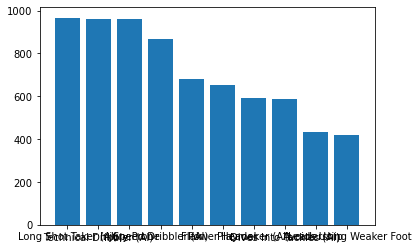

,0,1
0,Long Shot Taker (AI),967
1,Technical Dribbler (AI),959
2,Injury Prone,959
3,Speed Dribbler (AI),868
4,Flair,680
5,Power Header,654
6,Playmaker (AI),591
7,Dives Into Tackles (AI),588
8,Leadership,434
9,Avoids Using Weaker Foot,417


In [80]:
# Distribution of Traits in player_traits

traits = set()

for row in data['player_traits']:
    for t in row.split(','):
        traits.add(t.strip(' '))
        
traitsDict = {t:0 for t in traits}

for row in data['player_traits']:
    for t in row.split(','):
        traitsDict[t.strip(' ')] += 1

traitsDict.pop('')
sortedTraits = pd.DataFrame(sorted(list(traitsDict.items()), key=lambda x: x[1], reverse=True))[0:10]
plt.bar(sortedTraits[0], sortedTraits[1])
plt.show()

sortedTraits